<a href="https://colab.research.google.com/github/rubyvanrooyen/observation_planning/blob/main/callisto/Jupiter_Callisto_closest_orbit_eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import ephem
import numpy as np
from pprint import pprint
from datetime import datetime

In [ ]:
# print known planets and planet moons in ephem
pprint(ephem._libastro.builtin_planets())

[(0, 'Planet', 'Mercury'),
 (1, 'Planet', 'Venus'),
 (2, 'Planet', 'Mars'),
 (3, 'Planet', 'Jupiter'),
 (4, 'Planet', 'Saturn'),
 (5, 'Planet', 'Uranus'),
 (6, 'Planet', 'Neptune'),
 (7, 'Planet', 'Pluto'),
 (8, 'Planet', 'Sun'),
 (9, 'Planet', 'Moon'),
 (10, 'PlanetMoon', 'Phobos'),
 (11, 'PlanetMoon', 'Deimos'),
 (12, 'PlanetMoon', 'Io'),
 (13, 'PlanetMoon', 'Europa'),
 (14, 'PlanetMoon', 'Ganymede'),
 (15, 'PlanetMoon', 'Callisto'),
 (16, 'PlanetMoon', 'Mimas'),
 (17, 'PlanetMoon', 'Enceladus'),
 (18, 'PlanetMoon', 'Tethys'),
 (19, 'PlanetMoon', 'Dione'),
 (20, 'PlanetMoon', 'Rhea'),
 (21, 'PlanetMoon', 'Titan'),
 (22, 'PlanetMoon', 'Hyperion'),
 (23, 'PlanetMoon', 'Iapetus'),
 (24, 'PlanetMoon', 'Ariel'),
 (25, 'PlanetMoon', 'Umbriel'),
 (26, 'PlanetMoon', 'Titania'),
 (27, 'PlanetMoon', 'Oberon'),
 (28, 'PlanetMoon', 'Miranda')]


ASCII art for simple display of Jovian moon orbital distance from Jupiter

In [ ]:
import ephem

moons = ((ephem.Io(), 'i'),
         (ephem.Europa(), 'e'),
         (ephem.Ganymede(), 'g'),
         (ephem.Callisto(), 'c'))

# How to place discrete characters on a line that actually represents
# the real numbers -maxradii to +maxradii.

linelen = 65
maxradii = 30.

def put(line, character, radii):
    if abs(radii) > maxradii:
        return
    offset = radii / maxradii * (linelen - 1) / 2
    i = int(linelen / 2 + offset)
    line[i] = character

interval = ephem.hour * 3

now = ephem.now()
# or set a date
# date_str = '{}/{:02d}/{:02d}'.format(2021, 9, 3)
# date_str = '{}/{:02d}/{:02d}'.format(2021, 9, 21)
date_str = '{}/{:02d}/{:02d}'.format(2021, 10, 7)
today = datetime.strptime(date_str, '%Y/%m/%d')
now = ephem.Date(today)

now -= now % interval

t = now
#while t < now + 2:
while t < now + 17:
    line = [' '] * linelen
    put(line, 'J', 0)
    for moon, character in moons:
        moon.compute(t)
        put(line, character, moon.x)
    print(str(ephem.date(t))[5:], ''.join(line).rstrip())
    t += interval

print('East is to the right;')
print(', '.join([ '%s = %s' % (c, m.name) for m, c in moons ]))

10/7 00:00:00           c        g         i  J        e
10/7 03:00:00           c        g       i    J        e
10/7 06:00:00          c          g     i     J        e
10/7 09:00:00         c            g    i     J       e
10/7 12:00:00         c              g   i    J     e
10/7 15:00:00        c                g    i  J    e
10/7 18:00:00        c                 g      i  e
10/7 21:00:00        c                   g    Jei
10/8 00:00:00       c                      g eJ    i
10/8 03:00:00       c                      eg J     i
10/8 06:00:00       c                    e    g     i
10/8 09:00:00       c                  e      Jg   i
10/8 12:00:00       c                 e       J  g
10/8 15:00:00       c                e        i    g
10/8 18:00:00       c                e      i J     g
10/8 21:00:00       c                e    i   J       g
10/9 00:00:00       c                e  i     J        g
10/9 03:00:00       c                 e i     J         g
10/9 06:00:00       c 

In [ ]:
interval = ephem.hour * 1.5
date_str = '{}/{:02d}/{:02d}'.format(2021, 8, 27)
date_str = '{}/{:02d}/{:02d}'.format(2021, 8, 25)
#date_str = '{}/{:02d}/{:02d}'.format(2021, 9, 13)
#date_str = '{}/{:02d}/{:02d}'.format(2021, 9, 29)
#date_str = '{}/{:02d}/{:02d}'.format(2021, 10, 16)
today = datetime.strptime(date_str, '%Y/%m/%d')
now = ephem.Date(today)
now -= now % interval

t = now
#while t < now + 2:
while t < now + 5:
    line = [' '] * linelen
    put(line, 'J', 0)
    for moon, character in moons:
        moon.compute(t)
        put(line, character, moon.x)
    print(str(ephem.date(t))[5:], ''.join(line).rstrip())
    t += interval

print('East is to the right;')
print(', '.join([ '%s = %s' % (c, m.name) for m, c in moons ]))

8/25 00:00:00                   g             J     e   c
8/25 01:30:00                   g             J     ie   c
8/25 03:00:00                    g            J    i  e   c
8/25 04:30:00                    g            J   i   e   c
8/25 06:00:00                    g            J   i    e   c
8/25 07:30:00                     g           J i      e   c
8/25 09:00:00                     g           Ji       e    c
8/25 10:30:00                      g          i        e    c
8/25 12:00:00                      g         iJ        e     c
8/25 13:30:00                       g      i  J        e     c
8/25 15:00:00                       g     i   J        e      c
8/25 16:30:00                        g   i    J        e      c
8/25 18:00:00                         g  i    J       e        c
8/25 19:30:00                         g i     J       e        c
8/25 21:00:00                          gi     J      e          c
8/25 22:30:00                           g     J     e           c
8

In [ ]:
# set MeerKAT as observer
# Observer
MKT = ephem.Observer()
MKT.lat = '-30:42:39.8'
MKT.lon = '21:26:38.0'
MKT.elevation = 1086.6
MKT.horizon= '15'
#MKT.horizon = ephem.degrees(15.0)
MKT.epoch = ephem.J2000

In [ ]:
print(MKT)

<ephem.Observer date='2021/8/18 09:36:54' epoch='2000/1/1 12:00:00' lon='21:26:38.0' lat='-30:42:39.8' elevation=1086.6m horizon=15:00:00.0 temp=15.0C pressure=1010.0mBar>


In [100]:
def rise_set_time(date_str):
    obs_date = datetime.strptime(date_str, '%Y/%m/%d %H:%M')
    MKT.date = ephem.Date(obs_date)
 
    jupiter = ephem.Jupiter(MKT)
    callisto = ephem.Callisto(MKT)

    jupiter.compute(MKT)
    callisto.compute(MKT)
    phi = np.array(jupiter.radius)  # radius as an angle [rad]
    D = np.array(jupiter.earth_distance)  # ristance to Earth [AU]
    R = D*np.tan(phi)  # Jupiter radius [AU]

    risetime = MKT.next_rising(jupiter)
    settime = MKT.next_setting(jupiter, risetime)
    transittime = MKT.next_transit(jupiter, risetime)

#     MKT.date = risetime
#     jupiter.compute(MKT)
#     print(MKT.date, np.degrees(jupiter.alt), jupiter.ra, jupiter.dec)
#     MKT.date = settime
#     jupiter.compute(MKT)
#     print(MKT.date, np.degrees(jupiter.alt), jupiter.ra, jupiter.dec)
 
    print(f"Jupiter rises at {risetime} and sets at {settime}")
    print(f"Transit at {jupiter.transit_time}, {np.degrees(jupiter.transit_alt):.2f} [deg] elevation")

    MKT.date = risetime
    callisto.compute(MKT)
    r = callisto.x * R  # frac of radius, separation distance [AU]
    phi = np.degrees(np.arctan(r/D))  # deg
    print(f"  Callisto separation at {MKT.date} = {phi*60.:.2f} [arcmin]")
    MKT.date = transittime
    callisto.compute(MKT)
    r = callisto.x * R  # frac of radius, separation distance [AU]
    phi = np.degrees(np.arctan(r/D))  # deg
    print(f"  Callisto separation at {MKT.date} = {phi*60.:.2f} [arcmin]")
    MKT.date = settime
    callisto.compute(MKT)
    r = callisto.x * R  # frac of radius, separation distance [AU]
    phi = np.degrees(np.arctan(r/D))  # deg
    print(f"  Callisto separation at {MKT.date} = {phi*60.:.2f} [arcmin]")


# set observation date/time
def showtimes(elong_year, elong_month, elong_day):
    for day_ in range(elong_day-3, elong_day+4):
        if day_ > 30:
            day_ = day_ - 30
            month_ = elong_month + 1
            date_str = '{}/{:02d}/{:02d} {}:{}'.format(elong_year, month_, day_, 0, 0)
        else:
            date_str = '{}/{:02d}/{:02d} {}:{}'.format(elong_year, elong_month, day_, 0, 0)
        rise_set_time(date_str)
        print()

# showtimes(2021, 8, 27)
# showtimes(2021, 9, 13)
# showtimes(2021, 9, 30)
showtimes(2021, 10, 16)

#date_str = '{}/{:02d}/{:02d} {}:{}'.format(2021, 10, 16, 0, 0)
#rise_set_time(date_str)




Jupiter rises at 2021/10/13 13:19:50 and sets at 2021/10/14 00:09:08
Transit at 2021/10/13 18:44:29, 74.44 [deg] elevation
  Callisto separation at 2021/10/13 13:19:50 = 2.62 [arcmin]
  Callisto separation at 2021/10/13 18:44:29 = 3.36 [arcmin]
  Callisto separation at 2021/10/14 00:09:08 = 4.08 [arcmin]

Jupiter rises at 2021/10/14 13:15:50 and sets at 2021/10/15 00:05:10
Transit at 2021/10/14 18:40:29, 74.45 [deg] elevation
  Callisto separation at 2021/10/14 13:15:50 = 5.66 [arcmin]
  Callisto separation at 2021/10/14 18:40:30 = 6.26 [arcmin]
  Callisto separation at 2021/10/15 00:05:10 = 6.80 [arcmin]

Jupiter rises at 2021/10/15 13:11:52 and sets at 2021/10/16 00:01:11
Transit at 2021/10/15 18:36:31, 74.45 [deg] elevation
  Callisto separation at 2021/10/15 13:11:52 = 7.89 [arcmin]
  Callisto separation at 2021/10/15 18:36:31 = 8.25 [arcmin]
  Callisto separation at 2021/10/16 00:01:11 = 8.54 [arcmin]

Jupiter rises at 2021/10/16 13:07:54 and sets at 2021/10/16 23:57:14
Transit at

In [ ]:
jupiter = ephem.Jupiter(MKT)
obs_date = datetime.strptime(date_str, '%Y/%m/%d %H:%M')
MKT.date = ephem.Date(obs_date)
jupiter.compute(MKT)

risetime = MKT.next_rising(jupiter)
settime = MKT.next_setting(jupiter, risetime)

print(f"Jupiter rises at {risetime} and sets at {settime}")
print(f"Transet at {jupiter.transit_time}, {np.degrees(jupiter.transit_alt):.2f} [deg] elevation")

Jupiter rises at 2021/8/27 16:42:29 and sets at 2021/8/28 03:26:02
Transet at 2021/8/28 21:59:48, 73.24 [deg] elevation


In [ ]:
# apparent Earth distance calculations
def orbit(observer,  # ephem.Observer()
          solarbody,  # ephem.Body()
          obs_date=None,  # string CCYY-mm-dd HH:MM
          obs_period=1,  # period to calculate orbit over
          days=False,  # increment in days
          hours=False,  # increment in hours
          minutes=False,  # increment in minutes
          ):
    
    if obs_date is None:
        obs_date = datetime.now().replace(second=0, microsecond=0)
    # initiate observer date
    observer.date = ephem.Date(obs_date)

    # range increments
    if days:
        dt = 1
    elif hours:
        dt = ephem.hour
    else:  # default assumes hours
        dt = ephem.minute

    date_range = []
    solarbody_altitude = []  # altitude above the horizon
    solarbody_earth_distance = []  # Earth distance is in AU

    for inc_ in range(obs_period):
        date_range.append(ephem.Date(observer.date).datetime())
        solarbody.compute(observer)
        solarbody_altitude.append(np.degrees(solarbody.alt))
        solarbody_earth_distance.append(solarbody.earth_distance)
        # update observer date
        observer.date += dt

    return date_range, solarbody_altitude, solarbody_earth_distance

# Jupiter perigee
MKT.date = ephem.Date(obs_date)
jupiter = ephem.Jupiter(MKT)
[date_range,
 solarbody_altitude,
 solarbody_earth_distance] = orbit(MKT,
                                   jupiter,
                                   obs_date=obs_date,
                                   obs_period=1800,
                                   minutes=True)
print(date_range[0], date_range[-1])
print(solarbody_altitude)


2021-08-27 00:00:00 2021-08-28 05:59:00.000351
[59.317706752702854, 59.12551888983704, 58.93283925335098, 58.73968150362302, 58.546045640653155, 58.3519521550089, 58.15740104669026, 57.962405976075566, 57.76697377335399, 57.571118098903874, 57.37483895272522, 57.17814658010178, 56.98105464141189, 56.78356655175014, 56.5856891413057, 56.387432655362325, 56.18880392410919, 55.98980977773545, 55.7904536313357, 55.590749145288285, 55.3906963195932, 55.19030881462878, 54.989586630395024, 54.78853659708112, 54.587172375065386, 54.38549054925325, 54.18350478002305, 53.98121506737478, 53.778628241497614, 53.57575454767532, 53.37259398590787, 53.16915680147904, 52.96544299438882, 52.761459394826396, 52.5572162480755, 52.35271013904156, 52.147951313008335, 51.94294660016499, 51.73769600051152, 51.53220292914252, 51.32647763134173, 51.12052010710917, 50.91433718663399, 50.70793228501079, 50.501308817334156, 50.294470198698654, 50.08742325929347, 49.880171414213194, 49.6727180785524, 49.4650666674

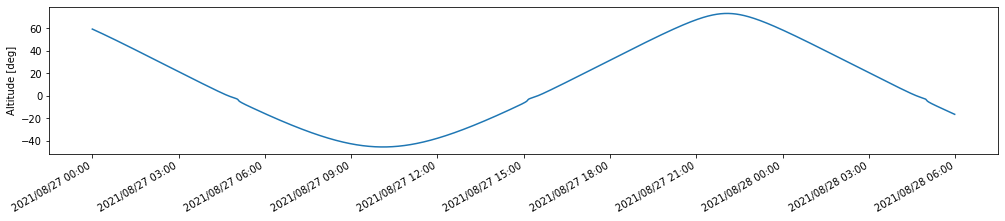

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(nrows=1, ncols=1,
                       figsize=(17, 3),
                       facecolor='white')
ax.plot(date_range, solarbody_altitude)
plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%Y/%m/%d %H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel('Altitude [deg]', fontsize=10)
plt.show()

In [ ]:
print(np.degrees(MKT.horizon))
print(MKT)

14.999999999999998
<ephem.Observer date='2021/8/27 16:42:29' epoch='2000/1/1 12:00:00' lon='21:26:38.0' lat='-30:42:39.8' elevation=1086.6m horizon=15:00:00.0 temp=15.0C pressure=1010.0mBar>
